**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno


import seaborn as sns
sns.set_context('talk')

from sqlalchemy import create_engine, text
import sqlite3

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.14.3'

In [3]:
melb_df = pd.read_csv('melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/tmp/ipykernel_3670/1799704423.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


In [42]:
melb_df.shape

(13580, 21)

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [5]:
# Ejercicio 1.1: Crear una base de datos en SQLite utilizando la libreria [SQLalchemy]
engine = create_engine('sqlite:///grupo11.db', echo=True)

In [6]:
# Ejercicio 1.2: Ingestar los datos en una tabla y el dataset de airbnb en otra.
melb_df.to_sql('melb_data', con=engine, if_exists="replace")

2022-05-29 20:15:42,832 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2022-05-29 20:15:42,832 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:15:42,833 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_data")
2022-05-29 20:15:42,833 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:15:42,835 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-29 20:15:42,836 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_data (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-29 20:15:42,836 INFO sqlalchemy.engine.Engine [no key 0.00047s] ()
2022-05-29 20:15:42,839 INFO sqlal

13580

In [7]:
# Ejercicio 1.2: Ingestar los datos provistos de Airbnb y crear la tabla

# Se unifica el typedata de la columna zipcode para luego poder hacer joins
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

# Se crea la tabla en SQL en la DB
airbnb_df.to_sql('airbnb_data', con=engine, if_exists="replace")


2022-05-29 20:15:54,050 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2022-05-29 20:15:54,050 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:15:54,051 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_data")
2022-05-29 20:15:54,051 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:15:54,053 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-29 20:15:54,054 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_data (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)


2022-05-29 20:15:54,054 INFO sqlalchemy.engine.Engine [no key 0.00047s] ()
2022-05-29 20:15:54,057 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_data_index ON airbnb_data ("index")
2022-05-29 20:15:54,057 INFO sqlalchemy.engine.Engine [no key 0.00043s] ()
202

22895

In [8]:
# Ejercicio 1.3: Implementar consultas en SQL que respondan con la siguiente información:
# Cantidad de registros por ciudad en airbnb_data
query1 = """SELECT city, COUNT(*) FROM airbnb_data
GROUP BY city
ORDER BY 2 DESC;""" 

# Cantidad de registros por ciudad y barrio (suburb) en airbnb_data
query2 = """SELECT city, suburb, COUNT(*) FROM airbnb_data
GROUP BY city, suburb
ORDER BY 3 DESC;"""

with engine.connect() as con:
    query_result1 = pd.read_sql_query(query1, con)
    
query_result1.head()

2022-05-29 20:16:03,243 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) FROM airbnb_data
GROUP BY city
ORDER BY 2 DESC;
2022-05-29 20:16:03,243 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,COUNT(*)
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967


In [9]:
# Consulta de cantidad de registros por ciudad
with engine.connect() as con:
    query_result2 = pd.read_sql_query(query2, con)
    
query_result2.head()

2022-05-29 20:16:06,186 INFO sqlalchemy.engine.Engine SELECT city, suburb, COUNT(*) FROM airbnb_data
GROUP BY city, suburb
ORDER BY 3 DESC;
2022-05-29 20:16:06,187 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,suburb,COUNT(*)
0,Melbourne,Melbourne,3850
1,Melbourne,Southbank,1190
2,Port Phillip,Saint Kilda,802
3,Stonnington,South Yarra,790
4,Melbourne,Docklands,612


***Ejercicio 1.4:*** Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

En este ejercicio se sigue el siguiente procedimiento:-
- sobre la tabla de Airbnb se calcula el promedio de los precios diarios, semanales y mensuales y se los pasa a una tabla nueva;
- luego se hace el JOIN con la tabal de Melbourne usando como pivote el zipcode

In [10]:
# Se calcula el promedio para el precio diario (price), semanal y mensual
query3 = """SELECT zipcode,
AVG(price) avg_dayly_price,
AVG(weekly_price) avg_weekly_price,
AVG(monthly_price) avg_montly_price
FROM airbnb_data
GROUP BY zipcode
;"""

with engine.connect() as con:
    result_query3 = pd.read_sql_query(query3, con)

result_query3.to_sql('zipcode_average_prices', con=engine, if_exists="replace")  


2022-05-29 20:16:13,182 INFO sqlalchemy.engine.Engine SELECT zipcode,
AVG(price) avg_dayly_price,
AVG(weekly_price) avg_weekly_price,
AVG(monthly_price) avg_montly_price
FROM airbnb_data
GROUP BY zipcode
;
2022-05-29 20:16:13,183 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:16:13,205 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("zipcode_average_prices")
2022-05-29 20:16:13,206 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:16:13,206 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("zipcode_average_prices")
2022-05-29 20:16:13,206 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-29 20:16:13,207 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-29 20:16:13,208 INFO sqlalchemy.engine.Engine 
CREATE TABLE zipcode_average_prices (
	"index" BIGINT, 
	zipcode FLOAT, 
	avg_dayly_price FLOAT, 
	avg_weekly_price FLOAT, 
	avg_montly_price FLOAT
)


2022-05-29 20:16:13,208 INFO sqlalchemy.engine.Engine [no key 0.00041s] ()
2022-05-29 20:16:13,211 INFO sqlal

248

In [11]:
# Se hace un INNER JOIN de la tabla de datos Melbourne con la de precios promedios y se crea la tabla
query4 = """SELECT *
from melb_data 
INNER JOIN zipcode_average_prices ON zipcode_average_prices.zipcode = melb_data.Postcode
"""
with engine.connect() as con:
    result_query4 = pd.read_sql_query(query4, con)

2022-05-29 20:16:16,767 INFO sqlalchemy.engine.Engine SELECT *
from melb_data 
INNER JOIN zipcode_average_prices ON zipcode_average_prices.zipcode = melb_data.Postcode

2022-05-29 20:16:16,768 INFO sqlalchemy.engine.Engine [raw sql] ()


In [ ]:
# Se escribe el archivo .csv extendidoo para el proximo ejercicio
result_query4.to_csv("melb_data_extended.csv", index=None)

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [12]:
# Ejercicio 2.1: Se carga desde la fila de datos extendido con que termina el ejercicio anterior
melb_combined_df = pd.read_csv('melb_data_extended.csv', index_col='index')
melb_combined_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'index.1', 'zipcode',
       'avg_dayly_price', 'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [15]:
melb_combined_df.shape

(13560, 26)

Previos a los análisis cuantitativos, **eliminamos las columnas** que no consideramos relevantes para el problema de predicción de precios. Las columnas que no presentan relevancia son:
- Propertycount: creemos que es solo un registro de numeración de propiedades por suburbio
- index.1: una columna de indices que proviene de un Join anterior
- zipcode: ya tenemos esa información en la variable Postcode
- Date: existen solo 58 registros de esta fecha, con lo cual suponemos es la fecha de carga del dato. Es irrelevante al precio.
- SellerG: figuran apellidos, deben ser los responsables de administrar la venta de la propiedad. Irrelevante al precio.
- Address: la dirección específica de cada propiedad. No describe entorno.

In [16]:
columns_to_drop = ['Propertycount','index.1','zipcode','Date','SellerG','Address']
melb_combined_df_droppped = melb_combined_df.drop(columns_to_drop,axis=1)
melb_combined_df_droppped.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'avg_dayly_price', 'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [18]:
melb_combined_df_droppped.shape

(13560, 20)

In [20]:
melb_combined_df_droppped.describe().round()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,avg_dayly_price,avg_weekly_price,avg_montly_price
count,13560.0,13560.0,13560.0,13560.0,13560.0,13560.0,13498.0,13560.0,7119.0,8195.0,13560.0,13560.0,13560.0,12705.0,12312.0
mean,3.0,1076351.0,10.0,3105.0,3.0,2.0,2.0,550.0,146.0,1965.0,-38.0,145.0,131.0,707.0,2620.0
std,1.0,639486.0,6.0,90.0,1.0,1.0,1.0,3957.0,129.0,37.0,0.0,0.0,64.0,340.0,1454.0
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,145.0,40.0,160.0,600.0
25%,2.0,650000.0,6.0,3044.0,2.0,1.0,1.0,176.0,93.0,1940.0,-38.0,145.0,95.0,470.0,1568.0
50%,3.0,905000.0,9.0,3084.0,3.0,1.0,2.0,440.0,126.0,1970.0,-38.0,145.0,115.0,610.0,2298.0
75%,3.0,1330000.0,13.0,3148.0,3.0,2.0,2.0,650.0,174.0,1999.0,-38.0,145.0,148.0,920.0,3375.0
max,10.0,9000000.0,47.0,3977.0,20.0,8.0,10.0,433014.0,6791.0,2018.0,-38.0,146.0,759.0,2237.0,10060.0


Del análsis cuantitativo de las variables numéricas, se observa que **Landsize** y **BuildingArea** presentan valores máximos que se alejan mucho del percentil 75, además de tener desviaciónes estándar inusualmente altas. Por otra parte, la variable **YearBuilt** presenta un valor mínimo que no es consistente con la lógica del descriptor (año: 1196).

/home/fredy/anaconda3/envs/diplodatos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

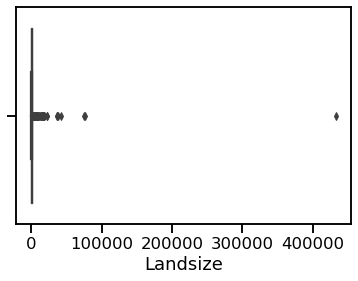

In [21]:
# Boxplot sobre Landsize para identificar outliers
sns.boxplot(melb_combined_df_droppped['Landsize'])

In [22]:
# Se identifica el index del oulier sobre Landsize (#11020)
melb_combined_df_droppped.sort_values(by=['Landsize'], ascending=False).head(5)

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,avg_dayly_price,avg_weekly_price,avg_montly_price
index,,,,,,,,,,,,,,,,,,,,
11020,Fitzroy,3,h,2700000.0,VB,2.1,3065.0,3.0,3.0,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,153.842377,1087.556962,3734.650
10504,Silvan,3,h,1085000.0,S,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Yarra Ranges,-37.84739,145.47052,Eastern Victoria,149.500000,NaN,NaN
687,Balwyn North,3,h,2000000.0,VB,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Boroondara,-37.80020,145.07000,Southern Metropolitan,97.268293,1118.000000,4063.000
5194,Reservoir,3,h,572000.0,S,11.2,3073.0,3.0,1.0,2.0,41400.0,NaN,NaN,Darebin,-37.71040,145.02570,Northern Metropolitan,273.926471,399.888889,1459.625
10045,Silvan,4,h,1070000.0,S,34.6,3795.0,4.0,2.0,3.0,38490.0,NaN,NaN,Yarra Ranges,-37.83229,145.43003,Eastern Victoria,149.500000,NaN,NaN


/home/fredy/anaconda3/envs/diplodatos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BuildingArea'>

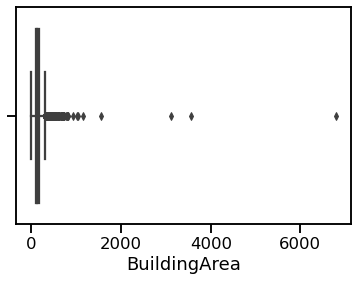

In [23]:
# Boxplot sobre BuildingArea para identificar outliers
sns.boxplot(melb_combined_df_droppped['BuildingArea'])

In [24]:
# Se identifica el index del oulier sobre BuildingArea (#1484)
melb_combined_df_droppped.sort_values(by=['BuildingArea'], ascending=False).head(5)

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,avg_dayly_price,avg_weekly_price,avg_montly_price
index,,,,,,,,,,,,,,,,,,,,
1484,Bulleen,4,h,1280000.0,S,11.8,3105.0,4.0,1.0,2.0,732.0,6791.0,NaN,Manningham,-37.7615,145.0897,Eastern Metropolitan,116.260870,528.000000,2000.000000
2560,Fitzroy North,2,t,930000.0,S,3.5,3068.0,2.0,3.0,0.0,2778.0,3558.0,NaN,Yarra,-37.7903,144.9859,Northern Metropolitan,126.012987,801.315789,2801.842105
1588,Camberwell,5,h,2608000.0,S,7.8,3124.0,5.0,2.0,4.0,730.0,3112.0,1920.0,Boroondara,-37.8424,145.0639,Southern Metropolitan,138.556818,526.666667,2742.571429
2234,Elsternwick,2,u,741000.0,S,8.5,3185.0,3.0,1.0,1.0,0.0,1561.0,1966.0,Glen Eira,-37.8829,145.0033,Southern Metropolitan,154.132075,826.100000,3374.900000
2830,Glen Iris,2,t,600000.0,VB,9.2,3146.0,2.0,1.0,1.0,0.0,1143.0,NaN,Stonnington,-37.8506,145.0465,Southern Metropolitan,135.833333,770.111111,2940.750000


/home/fredy/anaconda3/envs/diplodatos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

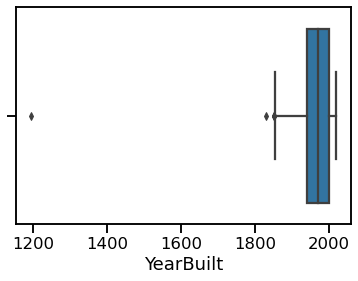

In [25]:
# Boxplot sobre YearBuilt para identificar outliers
sns.boxplot(melb_combined_df_droppped['YearBuilt'])

In [26]:
# Se identifica el index del oulier sobre YearBuilt (#9968)
melb_combined_df_droppped.sort_values(by=['YearBuilt'], ascending=True).head(5)

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,avg_dayly_price,avg_weekly_price,avg_montly_price
index,,,,,,,,,,,,,,,,,,,,
9968,Mount Waverley,3,h,1200000.0,VB,14.2,3149.0,3.0,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,119.415584,450.285714,1588.500000
2079,Collingwood,2,u,855000.0,S,1.6,3066.0,2.0,1.0,1.0,2886.0,122.0,1830.0,Yarra,-37.80420,144.98450,Northern Metropolitan,145.989899,920.078947,3087.230769
5860,St Kilda,3,u,1600000.0,PI,6.1,3182.0,3.0,2.0,2.0,0.0,3.0,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,147.729515,1051.441026,3847.400000
4843,Prahran,2,u,841000.0,S,4.5,3181.0,2.0,2.0,1.0,0.0,101.0,1850.0,Stonnington,-37.84700,144.99360,Southern Metropolitan,148.169565,868.148148,3304.382353
2554,Fitzroy,2,h,677000.0,S,1.6,3065.0,2.0,1.0,0.0,67.0,NaN,1850.0,Yarra,-37.79690,144.97590,Northern Metropolitan,153.842377,1087.556962,3734.650000


Claramente los valores atípicos son pocos y difieren mucho del resto y por ende decidimos eliminarlos para evitar distorsiones en el análisis, por lo que procedemos a eliminarlos y generamos un nuevo df.

In [27]:
# Se eliminan los 3 outliers más evidentes presentes en cada columna
indexes_to_drop = [9968,11020,1484] # se puede extender si se utiliza un criterio mas estricto sobre outliers
melb_cleaned = melb_combined_df_droppped.drop(index=indexes_to_drop)

Dado que el año de construcción es una variable crítica en el precio de la propiedad, 
analizamos si existen propiedades que son mucho más viejas que el grueso de datos

/home/fredy/anaconda3/envs/diplodatos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

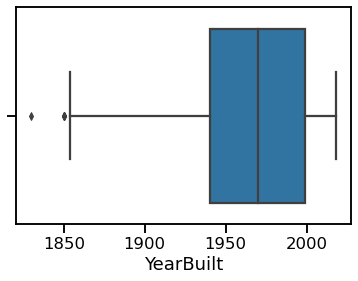

In [28]:
# Boxplot sobre YearBuilt para identificar outliers
sns.boxplot(melb_cleaned['YearBuilt'])

Del boxplot se observa que hay una **distribución pesada hacia la izquierda**, lo cual implica que hay un conjunto de propiedades muy antiguas, incluso dos outliers que son anteriores al año 1850. Las condiciones de precio de mercado para estas propiedades se supone son muy diferentes que para propiedades mas nuevas, con lo cual decidimimos analizar si conviene hacer un corte, por ejemplo, en propiedades desde el **año 1900 a la actualidad**.

In [29]:
# Se analizan cuantos datos existen previos al año 1900
print(f'Propiedades antes de 1900: {melb_cleaned[melb_cleaned.YearBuilt < 1900].shape[0]}')

Propiedades antes de 1900: 367


**La propiedades anteriores a 1990 son solo 367**, lo que **representa un 2%** del total del dataset. Consideramos útil eliminar estos datos por lo atipico de la fecha de construcción y teniendo en cuenta que no representa una pérdida significativa de información en el dataset.

In [30]:
# Eliminamos esos datos anteriores a 1900
menor_1900 = melb_cleaned[melb_cleaned.YearBuilt < 1900].index
melb_cleaned = melb_cleaned.drop(menor_1900)

/home/fredy/anaconda3/envs/diplodatos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

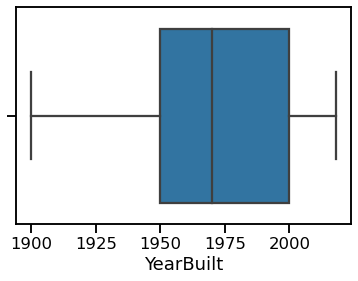

In [31]:
# Boxplot sobre YearBuilt para identificar outliers
sns.boxplot(melb_cleaned['YearBuilt'])

In [32]:
melb_cleaned.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'avg_dayly_price', 'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [34]:
melb_cleaned.shape

(13190, 20)

En esta sección vamos a realizar un **análisis de correlación intervariable** para ver si podemos eliminar columnas adicionales información redundante.  

<AxesSubplot:>

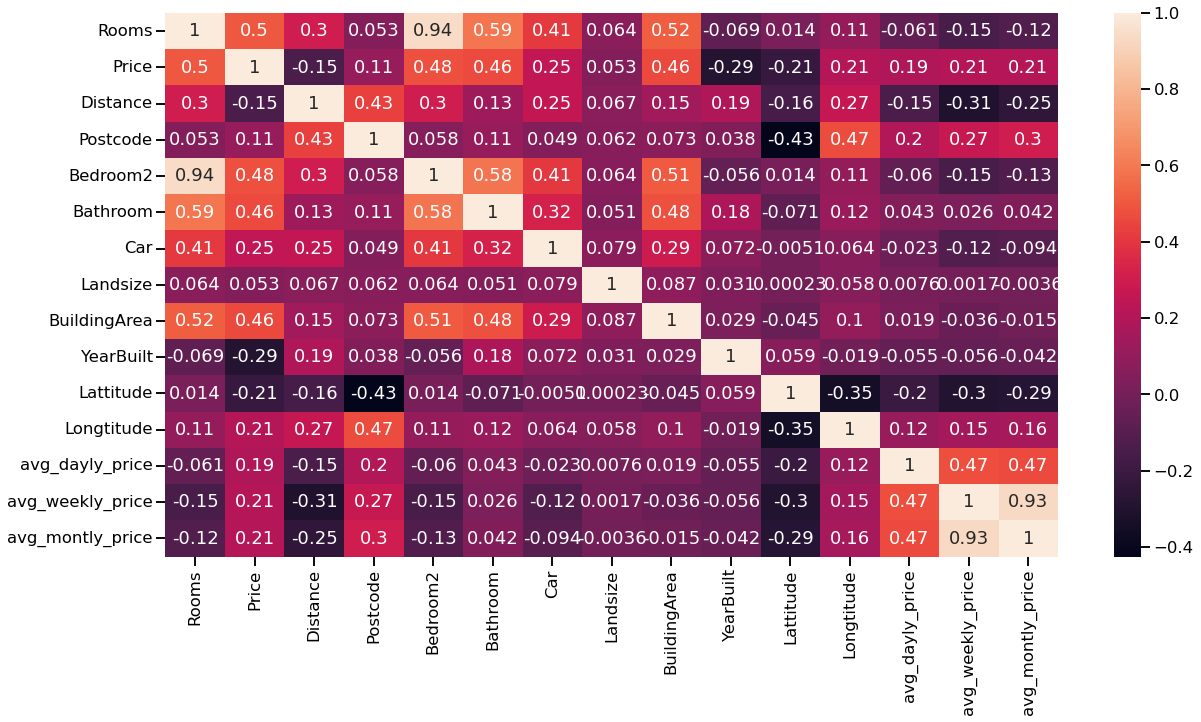

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(melb_cleaned.corr(method='pearson'), annot = True)

De lo anterior, se detecta que 'Rooms' y 'Bedroom2' tienen información redundante. Analizamos cual sacar determinando cual resulta mas valiosa en términos de correlación con la variable target: 'Price'.

In [36]:
cuartos = ['Rooms', 'Bedroom2', 'Price']
melb_cleaned[cuartos].corr()

,Rooms,Bedroom2,Price
Rooms,1.000000,0.944052,0.500047
Bedroom2,0.944052,1.000000,0.478762
Price,0.500047,0.478762,1.000000


**Primera conclusión:** la variable 'Room' tiene un correlación con 'Price' ligeramente superior.

In [37]:
melb_cleaned[cuartos].describe().round()

,Rooms,Bedroom2,Price
count,13190.0,13190.0,13190.0
mean,3.0,3.0,1059287.0
std,1.0,1.0,620742.0
min,1.0,0.0,85000.0
25%,2.0,2.0,643775.0
50%,3.0,3.0,896500.0
75%,3.0,3.0,1310750.0
max,10.0,20.0,9000000.0


**Segunda conclusión:** ambas variables contienen la misma cantidad de datos (13190), pero 'Room' presenta un valor máximo (10) menor que Bedroom2 (20), con lo cual se asume una distribución mas densa para 'Room'

**Basado en los dos análisis, eliminamos la variable redundante 'Bedroom2'**

In [38]:
melb_cleaned_final = melb_cleaned.drop('Bedroom2', axis=1)
melb_cleaned_final.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'avg_dayly_price', 'avg_weekly_price', 'avg_montly_price'],
      dtype='object')

In [39]:
melb_cleaned_final.shape

(13190, 19)

A continuación analizamos la **consistencia de datos**, identificando valores faltantes y posibles necesidades de imputación a futuro.

<AxesSubplot:>

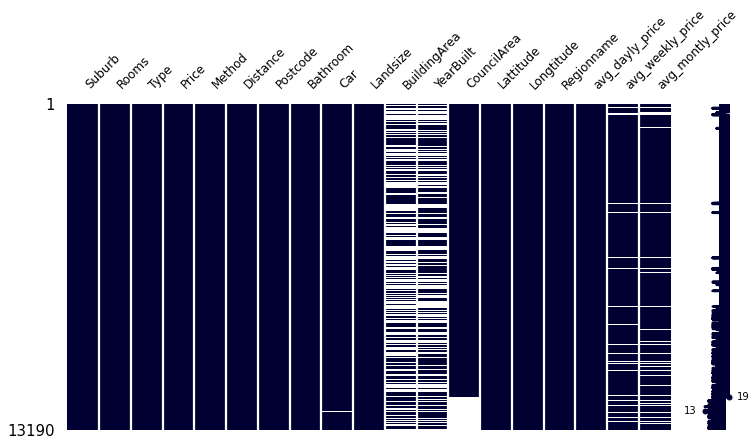

In [40]:
msno.matrix(melb_cleaned_final,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Observamos en que hay 6 columnas con valores faltantes:
- 4 provenientes del dataframe de Melbourne: Car, BuildingArea, YearBuilt y CouncilArea.
- 2 provenientes del merge con el datafrane de AirBnB: acg_weekly_price y avg_monthly_price.


**Ejercicio 2.2: Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB.**

El dataframe que tenemos al momento contiene la información depurada del Melbourne dataframe, y el agregado de tres columnas ('avg_dayly_price', 'avg_weekly_price', 'avg_montly_price') obtenidas del dataframe de AirBnB. Asimismo, ya contamos con información que describe el entorno de la propiedad ('CouncilArea', 'Lattitude', 'Longtitude', 'Regionname'). Analizando la información disponible en el dataframe de AirBnB no vemos que exista una columna con información adicional que se aprecie de valor para correlacionar el precio con el entorno.


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [41]:
melb_cleaned_final.to_csv('melb_df_merged_Alfredo.csv', index=False)